# Merged Crime Data for All Cities

## Summary
### Individual City Statistics:
1. **San Francisco:** 
    * Individual t-test: t-statistic = -0.34, pvalue = 0.73
    * One-Way ANOVA: F value = 0.39, pvalue = 0.94
2. **New York City:** 
    * Individual t-test: t-statistic = -1.80, pvalue = 0.074
    * One-Way ANOVA: F value = 1.14, pvalue = 0.33
3. **Minneapolis:** 
    * Individual t-test: t-statistic = 0.66, pvalue = 0.51
    * One-Way ANOVA: F value = 0.20, pvalue = 0.99
4. **Portland:** 
    * Individual t-test: t-statistic = -0.76, pvalue = 0.45
    * One-Way ANOVA: F value = 0.34, pvalue = 0.96
5. **Denver:**
    * Individual t-test: t-statistic = -1.33, pvalue = 0.19
    * One-Way ANOVA: F value = 1.13, pvalue = 0.34

### Overall Crime During Moon Phase Statistics:
- **Individual t-test:** t-statistic = -0.36, pvalue = 0.72
- **One-Way ANOVA:** F value = 0.046, pvalue = 0.999

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats

In [2]:
# Concatenate csv files for each city into one data frame
filepaths = ['csv_files/den_summary.csv', 'csv_files/mpls_summary.csv', 'csv_files/nyc_summary.csv', 'csv_files/portlanddata.csv', 'csv_files/sf_summary.csv']
data_comp = pd.concat(map(pd.read_csv, filepaths), ignore_index=True, sort=False)

data_comp.head()

,Unnamed: 0,Date,Percent Illumination,Total Crimes,City,Full Date,% Illumination
0,0,2015-01-01,84.0,296,Denver,NaN,NaN
1,1,2015-01-02,91.0,222,Denver,NaN,NaN
2,2,2015-01-03,96.0,186,Denver,NaN,NaN
3,3,2015-01-04,99.0,162,Denver,NaN,NaN
4,4,2015-01-05,100.0,234,Denver,NaN,NaN


In [3]:
# List of column names in dataframe
data_comp.columns

Index(['Unnamed: 0', 'Date', 'Percent Illumination', 'Total Crimes', 'City',
       'Full Date', '% Illumination'],
      dtype='object')

In [4]:
# Remove unwanted columns
data_comp_clean = data_comp

# Remove unwanted columns
data_comp_clean.drop(labels=['Unnamed: 0', 'Full Date', '% Illumination'], axis=1, inplace=True)
data_comp_clean.head()


,Date,Percent Illumination,Total Crimes,City
0,2015-01-01,84.0,296,Denver
1,2015-01-02,91.0,222,Denver
2,2015-01-03,96.0,186,Denver
3,2015-01-04,99.0,162,Denver
4,2015-01-05,100.0,234,Denver


In [5]:
# Export to csv
data_comp_clean.to_csv("csv_files/data_comp.csv")

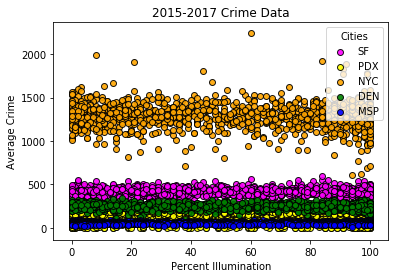

In [6]:
# Obtain the x and y coordinates for each of the five cities
sf = data_comp_clean.loc[(data_comp_clean["City"] == "San Francisco")]
pdx = data_comp_clean.loc[(data_comp_clean["City"] == "Portland")]
nyc = data_comp_clean.loc[(data_comp_clean["City"] == "NYC")]
den = data_comp_clean.loc[(data_comp_clean["City"] == "Denver")]
msp = data_comp_clean.loc[(data_comp_clean["City"] == "Minneapolis")]

# Build the scatter plots for each city:
# Total Crime for San Francisco
sf_crimes = sf['Total Crimes']

# Total Crime for Portland
pdx_crimes = pdx['Total Crimes']

# Total Crime for New York City
nyc_crimes = nyc['Total Crimes']

# Total Crime for Denver
den_crimes = den['Total Crimes']

# Total Crime for Minneapolis
msp_crimes = msp['Total Crimes']


# Scatter plots for city types with 
plt.scatter(sf['Percent Illumination'], sf_crimes, marker ='o',
            facecolors = "magenta", edgecolors='black', alpha = 0.9, linewidth = 1, label="SF")

plt.scatter(pdx['Percent Illumination'], pdx_crimes, marker ='o', 
            facecolors ="yellow", edgecolors='black', alpha = 0.9, linewidth = 1, label="PDX")

plt.scatter(nyc['Percent Illumination'], nyc_crimes, marker ='o', 
            facecolors ="orange", edgecolors='black', alpha = 0.9, linewidth = 1, label="NYC")
               
plt.scatter(den['Percent Illumination'], den_crimes, marker ='o', 
            facecolors ="green", edgecolors='black', alpha = 0.9, linewidth = 1, label="DEN")
               
plt.scatter(msp['Percent Illumination'], msp_crimes, marker ='o', 
            facecolors ="blue", edgecolors='black', alpha = 0.9, linewidth = 1, label="MSP")

# Incorporate the other graph properties: Title, x-label, y-label, and legend
# Chart title
plt.title("2015-2017 Crime Data")

# x label
plt.xlabel("Percent Illumination")

# y label
plt.ylabel("Average Crime")

# legend 
plt.legend(loc='upper right', title='Cities')

# Save plot
plt.savefig("images/all_cities_scatter.png")

# Show plot
plt.show()

In [7]:
# Create percent illumination bins
bins = [0, 3, 10, 21.5, 35.5, 51, 66, 79, 90, 97, 100]
group_name = ['0-3', '4-10', '11-21', 
              '22-35', '36-50', '51-65', 
              '66-78', '79-89', '90-96', '97-100']

data_comp_clean['Percent Illumination'] = pd.cut(data_comp_clean['Percent Illumination'], 
                                      bins, 
                                      labels = group_name, 
                                      include_lowest=True)

#Group the merged data by percent illumination
by_illumination = data_comp_clean.groupby('Percent Illumination')

# Calculate average crime
avg_crime = by_illumination['Total Crimes'].mean()

# Store illumination bins in a dataframe            
df_summary_new = pd.DataFrame({'Average Crime': avg_crime})

# Print new summary data frame
df_summary_new

,Average Crime
Percent Illumination,
0-3,437.534375
4-10,436.640426
11-21,431.261682
22-35,431.433028
36-50,432.131624
51-65,433.676636
66-78,429.864151
79-89,434.299099
90-96,425.937037


In [8]:
# Check formatting of summary table
data_comp_clean.head()

,Date,Percent Illumination,Total Crimes,City
0,2015-01-01,79-89,296,Denver
1,2015-01-02,90-96,222,Denver
2,2015-01-03,90-96,186,Denver
3,2015-01-04,97-100,162,Denver
4,2015-01-05,97-100,234,Denver


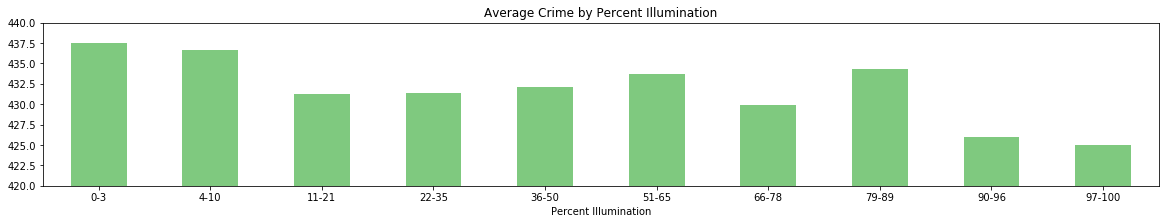

In [9]:
# Use DataFrame.plot() in order to create a bar chart of the data
df_summary_new.plot(kind="bar", figsize=(20,3), title='Average Crime by Percent Illumination', legend=False, 
                    ylim=(420,440), rot=0, colormap = 'Accent')

# Save plot
plt.savefig("images/avg_crime_bar.png")

# Show plot
plt.show()

In [10]:
# Calculate average crime for each day
daily_avg_crime = data_comp_clean['Total Crimes'].mean()
print(daily_avg_crime)

431.8217153284672


In [11]:
# Sort the total crimes by day by full moon days only
full_moon = data_comp_clean.loc[data_comp_clean['Percent Illumination'] == '97-100', :]

full_moon.head()

,Date,Percent Illumination,Total Crimes,City
3,2015-01-04,97-100,162,Denver
4,2015-01-05,97-100,234,Denver
5,2015-01-06,97-100,232,Denver
33,2015-02-03,97-100,248,Denver
34,2015-02-04,97-100,240,Denver


In [12]:
# Perform t-test to determine rejection or acceptance of null hypothesis
stats.ttest_1samp(full_moon['Total Crimes'], daily_avg_crime)

Ttest_1sampResult(statistic=-0.36052899981803965, pvalue=0.7185915187025718)

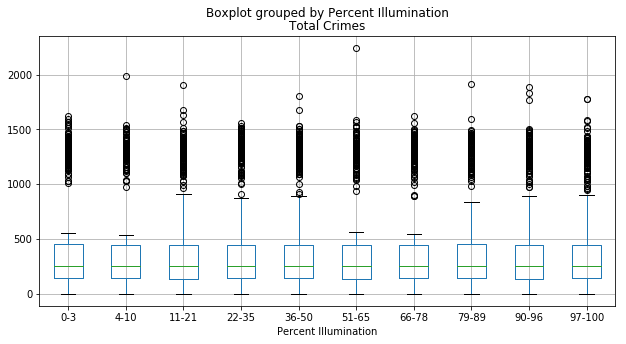

In [13]:
# Create a boxplot to compare means
data_comp_clean.boxplot("Total Crimes", by="Percent Illumination", figsize=(10, 5))

# Save plot
plt.savefig("images/totalcrime_box.png")

In [14]:
# Extract individual groups for ANOVA
group1 = data_comp_clean[data_comp_clean["Percent Illumination"] == "0-3"]["Total Crimes"]
group2 = data_comp_clean[data_comp_clean["Percent Illumination"] == "4-10"]["Total Crimes"]
group3 = data_comp_clean[data_comp_clean["Percent Illumination"] == "11-21"]["Total Crimes"]
group4 = data_comp_clean[data_comp_clean["Percent Illumination"] == "22-35"]["Total Crimes"]
group5 = data_comp_clean[data_comp_clean["Percent Illumination"] == "36-50"]["Total Crimes"]
group6 = data_comp_clean[data_comp_clean["Percent Illumination"] == "51-65"]["Total Crimes"]
group7 = data_comp_clean[data_comp_clean["Percent Illumination"] == "66-78"]["Total Crimes"]
group8 = data_comp_clean[data_comp_clean["Percent Illumination"] == "79-89"]["Total Crimes"]
group9 = data_comp_clean[data_comp_clean["Percent Illumination"] == "90-96"]["Total Crimes"]
group10 = data_comp_clean[data_comp_clean["Percent Illumination"] == "97-100"]["Total Crimes"]

# One way ANOVA test
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

F_onewayResult(statistic=0.04561715621741917, pvalue=0.9999869659412618)

# **The End**